<a href="https://colab.research.google.com/github/TheThreeRs/DataStudy/blob/main/DatasetImbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fixing Imbalanced Dataset
## Create Random datapoints
We create an array of 10200 datapoints. First 100 points are 1, second 100 points are 2, and the rest is 0.
It is a simple array `y_true`. 

In [15]:
# calculates precision for 1:1:100 dataset 

from sklearn.metrics import precision_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg

import numpy as np
myarray= np.array(y_true)
myarray.shape


(10200,)

## Make Random predictions
Now we have an array, we can make random predictions from each array set and concatenating into a single array `y_pred`.

In [ ]:
# define predictions
pred_pos1 = [0 for _ in range(1)] + [1 for _ in range(99)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(1)] + [2 for _ in range(70)] + [0 for _ in range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg

# calculate prediction
precision = precision_score(y_true, y_pred, labels=[1, 2], average='micro')
print('Precision: %.3f' % precision)

# Prediction with .990 precision
If we have incorrect predictions for each range once, we end up with .990 precision

In [14]:
# define predictions
pred_pos1 = [0 for _ in range(1)] + [1 for _ in range(99)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(1)] + \
    [2 for _ in range(1)] + [0 for _ in range(9998)]
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, labels=[1, 2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.990


### Make Classification with weight 1:100
We create the dataset by classifying a sample size of 1000 with 2 features, with a weight of 1:100

In [4]:

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

### Display the results

We vary the dataset size for a 1:100 imbalanced dataset and display on a plot

I picked the colors from the tableu20 set: 
```#tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
#             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
#             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
#             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
#             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]


Size=100, Ratio=Counter({1: 90, 0: 10})
Size=1000, Ratio=Counter({1: 900, 0: 100})
Size=10000, Ratio=Counter({1: 9000, 0: 1000})
Size=100000, Ratio=Counter({1: 90000, 0: 10000})


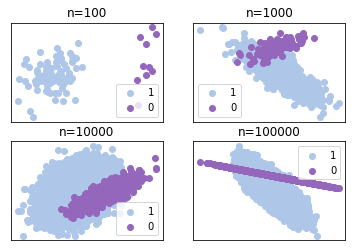

In [85]:

from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import itertools

# dataset sizes
sizes = [100, 1000, 10000, 100000]

colorSet = [(174, 199, 232), (148, 103, 189)] 

for i in range(len(colorSet)):    
    r, g, b = colorSet[i]    
    colorSet[i] = (r / 255., g / 255., b / 255.)  

colors = itertools.cycle(colorSet)
# create and plot a dataset with each size
for i in range(len(sizes)):
	# determine the dataset size
	n = sizes[i]
	# create the dataset
	X, y = make_classification(n_samples=n, n_features=2, n_redundant=0,
		n_clusters_per_class=1, weights=[0.1], flip_y=0, random_state=1)
	# summarize class distribution
	counter = Counter(y)
	print('Size=%d, Ratio=%s' % (n, counter))
	# define subplot
	pyplot.subplot(2, 2, 1+i)
	pyplot.title('n=%d' % n)
	pyplot.xticks([])
	pyplot.yticks([])
	# scatter plot of examples by class label
	for label, _ in counter.items():
		row_ix = where(y == label)[0]
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors))
	pyplot.legend()
# show the figure
pyplot.show()